# Prodigy Data science internship(1st june 2024 to 30th june 2024)

# Task 4:Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
%matplotlib inline

In [4]:
data=pd.read_csv("D:/output_file.csv")

# data traversing

In [3]:
data.head()

Unnamed: 0                                 user_name    user_location  \
0         0.0                             DeSota Wilson      Atlanta, GA   
1         1.0                                  CryptoND              NaN   
2         2.0                                 Tdlmatias  London, England   
3         3.0                      Crypto is the future              NaN   
4         4.0  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader           Europa   

                                    user_description      user_created  \
0  Biz Consultant, real estate, fintech, startups...   4/26/2009 20:05   
1  😎 BITCOINLIVE is a Dutch platform aimed at inf...  10/17/2019 20:12   
2  IM Academy : The best #forex, #SelfEducation, ...  11/10/2014 10:50   
3  I will post a lot of buying signals for BTC tr...   9/28/2019 16:48   
4  Co-founder @RENJERJerky | Forbes 30Under30 | I...    2/3/2016 13:15   

   user_followers  user_friends  user_favourites user_verified  \
0          8534.0        7605.0           4838.0         False   
1          6769.0        1532.0          25483.0         False   
2           128.0         332.0            924.0         False   
3           625.0         129.0             14.0         False   
4          1249.0        1472.0          10482.0         False   

              date                                               text  \
0  2/10/2021 23:59  Blue Ridge Bank shares halted by NYSE after #b...   
1  2/10/2021 23:58  😎 Today, that's this #Thursday, we will do a "...   
2  2/10/2021 23:54  Guys evening, I have read this article about B...   
3  2/10/2021 23:54  $BTC A big chance in a billion! Price: \487264...   
4  2/10/2021 23:54  This network is secured by 9 508 nodes as of t...   

                                    hashtags               source is_retweet  \
0                                ['bitcoin']      Twitter Web App      False   
1  ['Thursday', 'Btc', 'wallet', 'security']  Twitter for Android      False   
2                                        NaN      Twitter Web App      False   
3         ['Bitcoin', 'FX', 'BTC', 'crypto']              dlvr.it      False   
4                                    ['BTC']      Twitter Web App      False   

                                           cleanText  Polarity Score  \
0  blue ridge bank shares halted nyse bitcoin atm...            0.00   
1  today thursday take friend leowandersleb btc w...            0.00   
2     guys evening read article btc would like share            0.00   
3    btc big chance billion price bitcoin btc crypto            0.00   
4  network secured nodes today soon biggest bears...           -0.25   

   sentiment  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [4]:
data.tail()

Unnamed: 0                  user_name  user_location  \
14933     14933.0              BittrexPrices            NaN   
14934     14934.0               coreyography            NYC   
14935     14935.0  WSB CFO _ Dogecoinwizzard  New York, USA   
14936     14936.0  WSB CFO _ Dogecoinwizzard  New York, USA   
14937         NaN                        NaN            NaN   

                                        user_description     user_created  \
14933  Scans Bittrex’s main currencies hourly | Also ...  5/25/2018 20:30   
14934  DJ / PRODUCER / PHARM D / HALF OF @hausofoz. H...   6/4/2008 22:00   
14935  The most beautiful sea hasn't been crossed yet...  12/24/2018 7:34   
14936  The most beautiful sea hasn't been crossed yet...  12/24/2018 7:34   
14937                                                NaN              NaN   

       user_followers  user_friends  user_favourites user_verified  \
14933          3130.0           1.0             18.0         False   
14934          2430.0         478.0          12170.0         False   
14935           279.0         218.0           1778.0         False   
14936           279.0         218.0           1778.0         False   
14937             NaN           NaN              NaN           NaN   

                 date                                               text  \
14933  2/7/2021 13:37  🔄 Prices update in $USDT (1 hour):\r\n\r\n$BTC...   
14934  2/7/2021 13:37  #SuperBowl Prediction:\r\n@dogecoin $0.07 #dog...   
14935  2/7/2021 13:37  @SneadThe If You Own #dogecoin Hit The follow ...   
14936  2/7/2021 13:37  @DogeToADolla If You Own #dogecoin Hit The fol...   
14937             NaN                                                NaN   

                                                hashtags              source  \
14933                                                NaN      Bittrex Prices   
14934  ['SuperBowl', 'dogecoin', 'Bitcoin', 'BTC', 'd...  Twitter for iPhone   
14935   ['dogecoin', 'elonforPresident', 'eastmankodak']  Twitter for iPhone   
14936   ['dogecoin', 'elonforPresident', 'eastmankodak']  Twitter for iPhone   
14937                                                NaN                 NaN   

      is_retweet                                          cleanText  \
14933      False                prices update usdt hour btc eth xrp   
14934      False  superbowl prediction dogecoin dogecoin bitcoin...   
14935      False  sneadthe dogecoin hit follow button elonforpre...   
14936      False  dogetoadolla dogecoin hit follow button elonfo...   
14937        NaN                                                NaN   

       Polarity Score  sentiment  
14933             0.0        0.0  
14934             0.0        0.0  
14935             0.0        0.0  
14936             0.0        0.0  
14937             NaN        NaN

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14938 entries, 0 to 14937
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        14937 non-null  float64
 1   user_name         14936 non-null  object 
 2   user_location     8906 non-null   object 
 3   user_description  13951 non-null  object 
 4   user_created      14937 non-null  object 
 5   user_followers    14937 non-null  float64
 6   user_friends      14937 non-null  float64
 7   user_favourites   14937 non-null  float64
 8   user_verified     14937 non-null  object 
 9   date              14937 non-null  object 
 10  text              14937 non-null  object 
 11  hashtags          11888 non-null  object 
 12  source            14777 non-null  object 
 13  is_retweet        14937 non-null  object 
 14  cleanText         14936 non-null  object 
 15  Polarity Score    14937 non-null  float64
 16  sentiment         14937 non-null  float6

In [6]:
data.columns

Index(['Unnamed: 0', 'user_name', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet',
       'cleanText', 'Polarity Score', 'sentiment'],
      dtype='object')

# data cleaning 

In [7]:
data.isnull()

Unnamed: 0  user_name  user_location  user_description  user_created  \
0           False      False          False             False         False   
1           False      False           True             False         False   
2           False      False          False             False         False   
3           False      False           True             False         False   
4           False      False          False             False         False   
...           ...        ...            ...               ...           ...   
14933       False      False           True             False         False   
14934       False      False          False             False         False   
14935       False      False          False             False         False   
14936       False      False          False             False         False   
14937        True       True           True              True          True   

       user_followers  user_friends  user_favourites  user_verified   date  \
0               False         False            False          False  False   
1               False         False            False          False  False   
2               False         False            False          False  False   
3               False         False            False          False  False   
4               False         False            False          False  False   
...               ...           ...              ...            ...    ...   
14933           False         False            False          False  False   
14934           False         False            False          False  False   
14935           False         False            False          False  False   
14936           False         False            False          False  False   
14937            True          True             True           True   True   

        text  hashtags  source  is_retweet  cleanText  Polarity Score  \
0      False     False   False       False      False           False   
1      False     False   False       False      False           False   
2      False      True   False       False      False           False   
3      False     False   False       False      False           False   
4      False     False   False       False      False           False   
...      ...       ...     ...         ...        ...             ...   
14933  False      True   False       False      False           False   
14934  False     False   False       False      False           False   
14935  False     False   False       False      False           False   
14936  False     False   False       False      False           False   
14937   True      True    True        True       True            True   

       sentiment  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
14933      False  
14934      False  
14935      False  
14936      False  
14937       True  

[14938 rows x 17 columns]

In [8]:
data.count()

Unnamed: 0          14937
user_name           14936
user_location        8906
user_description    13951
user_created        14937
user_followers      14937
user_friends        14937
user_favourites     14937
user_verified       14937
date                14937
text                14937
hashtags            11888
source              14777
is_retweet          14937
cleanText           14936
Polarity Score      14937
sentiment           14937
dtype: int64

In [9]:
#deleting null values rows
data=data.dropna()
data.count()

Unnamed: 0          7189
user_name           7189
user_location       7189
user_description    7189
user_created        7189
user_followers      7189
user_friends        7189
user_favourites     7189
user_verified       7189
date                7189
text                7189
hashtags            7189
source              7189
is_retweet          7189
cleanText           7189
Polarity Score      7189
sentiment           7189
dtype: int64

In [10]:
data.duplicated()

0        False
4        False
5        False
6        False
9        False
         ...  
14927    False
14931    False
14934    False
14935    False
14936    False
Length: 7189, dtype: bool

# EDA(Exploratory data analyis)

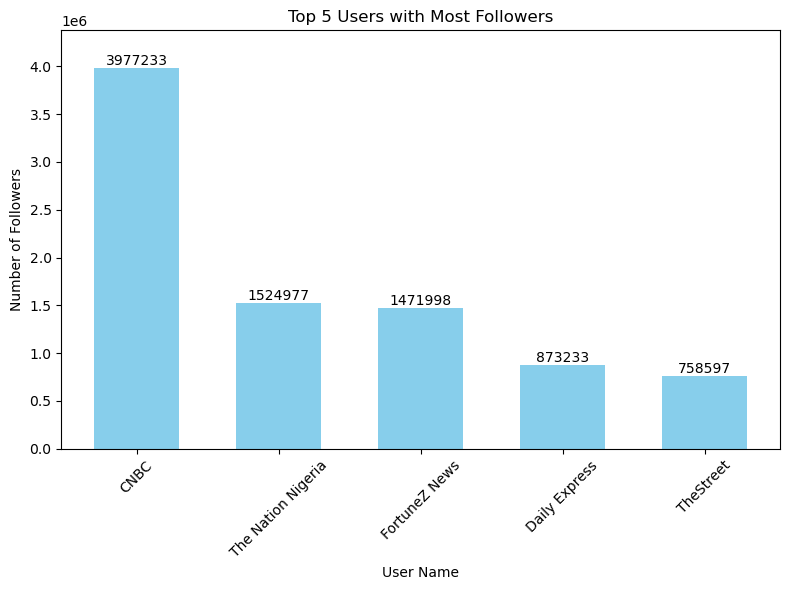

In [68]:


# Sort unique_top_users by follower count (descending)

sorted_users = data.sort_values(by="user_followers", ascending=False)
unique_top_users = sorted_users.drop_duplicates(subset="user_name").head(5)
# Create a bar chart
top_5_users = unique_top_users.sort_values(by="user_followers", ascending=False)

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

bars = plt.bar(top_5_users["user_name"], top_5_users["user_followers"], color='skyblue', width=0.6)  # Adjust the width as needed

# Add follower count on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{int(bar.get_height())}", ha='center', va='bottom')

plt.xlabel("User Name")
plt.ylabel("Number of Followers")
plt.title("Top 5 Users with Most Followers" )
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set y-axis limits to accommodate all top 5 users
plt.ylim(0, top_5_users["user_followers"].max() * 1.1)

plt.tight_layout()
plt.show()


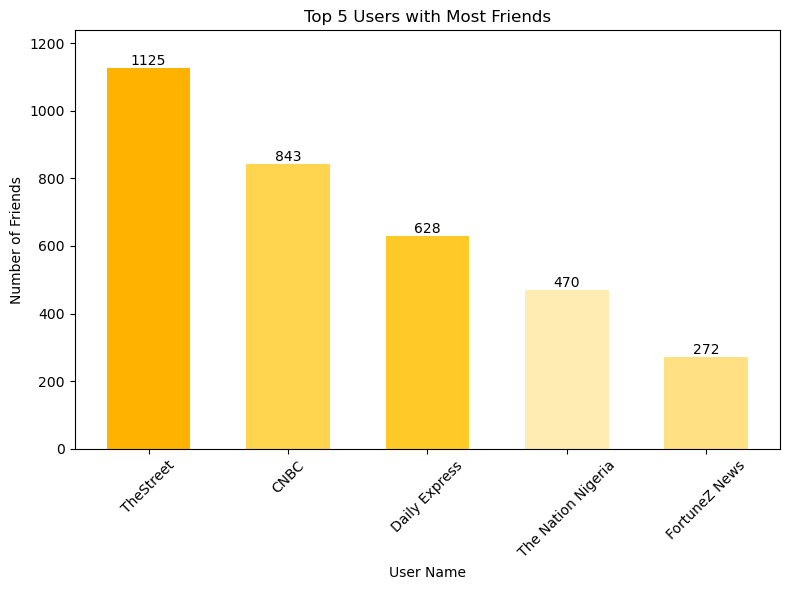

In [12]:


# Sort unique_top_users by friend count (descending)
top_5_users = unique_top_users.sort_values(by="user_friends", ascending=False)

# Define your custom color palette
honey_colors = ["#FFB300", "#FFD54F", "#FFCA28", "#FFECB3", "#FFE082"]  # Example colors

# Create a bar chart with custom colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

bars = plt.bar(top_5_users["user_name"], top_5_users["user_friends"], color=honey_colors, width=0.6)  # Adjust the width as needed

# Add friend count on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{int(bar.get_height())}", ha='center', va='bottom')

plt.xlabel("User Name")
plt.ylabel("Number of Friends")
plt.title("Top 5 Users with Most Friends")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set y-axis limits to accommodate all top 5 users
plt.ylim(0, top_5_users["user_friends"].max() * 1.1)

plt.tight_layout()
plt.show()





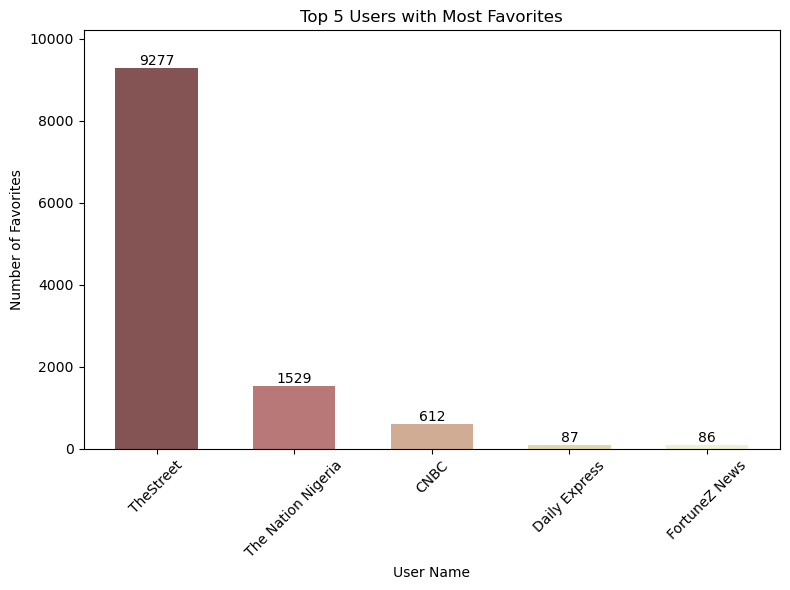

In [13]:

# Define your custom color palette with different shades of pink
pink_colors = sns.color_palette("pink", 5)

# Sort unique_top_users by favorite count (descending)
top_5_users = unique_top_users.sort_values(by="user_favourites", ascending=False)

# Create a bar chart with custom colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

bars = plt.bar(top_5_users["user_name"], top_5_users["user_favourites"], color=pink_colors, width=0.6)  # Adjust the width as needed

# Add favorite count on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{int(bar.get_height())}", ha='center', va='bottom')

plt.xlabel("User Name")
plt.ylabel("Number of Favorites")
plt.title("Top 5 Users with Most Favorites")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set y-axis limits to accommodate all top 5 users
plt.ylim(0, top_5_users["user_favourites"].max() * 1.1)

plt.tight_layout()
plt.show()


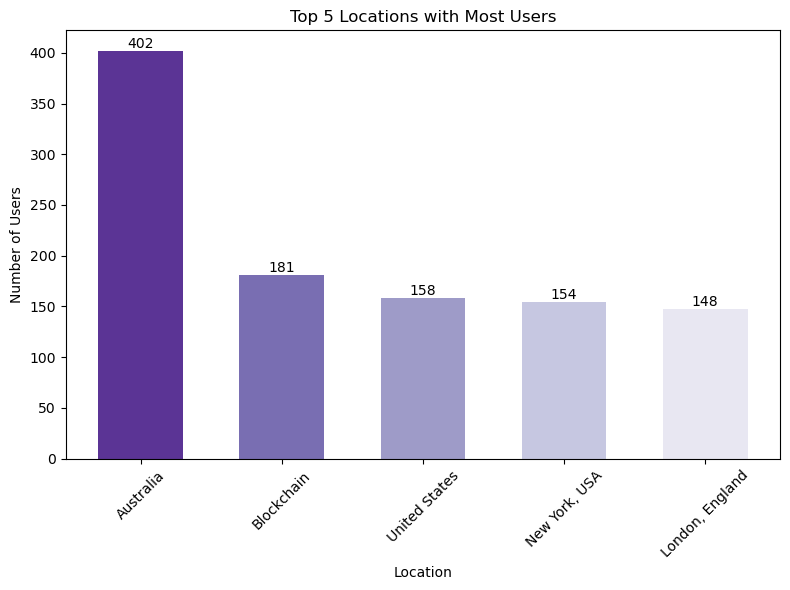

In [14]:

# Count the number of users per location
location_counts = data["user_location"].value_counts()

# Select the top 5 locations
top_5_locations = location_counts.head(5)

# Define a custom color palette with varying shades of purple (reversed order)
purple_palette = sns.color_palette("Purples_r", 5)

# Create a bar chart with custom colors
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

bars = plt.bar(top_5_locations.index, top_5_locations.values, color=purple_palette, width=0.6)  # Adjust the width as needed

# Add count on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{int(bar.get_height())}", ha='center', va='bottom')

plt.xlabel("Location")
plt.ylabel("Number of Users")
plt.title("Top 5 Locations with Most Users")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()



C:\Users\91620\AppData\Local\Temp\ipykernel_23096\968626397.py:14: UserWarning: Glyph 128104 (\N{MAN}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\968626397.py:14: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\968626397.py:14: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\968626397.py:14: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  plt.tight_layout()
C:\Users\91620\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128104 (\N{MAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\91620\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from cu

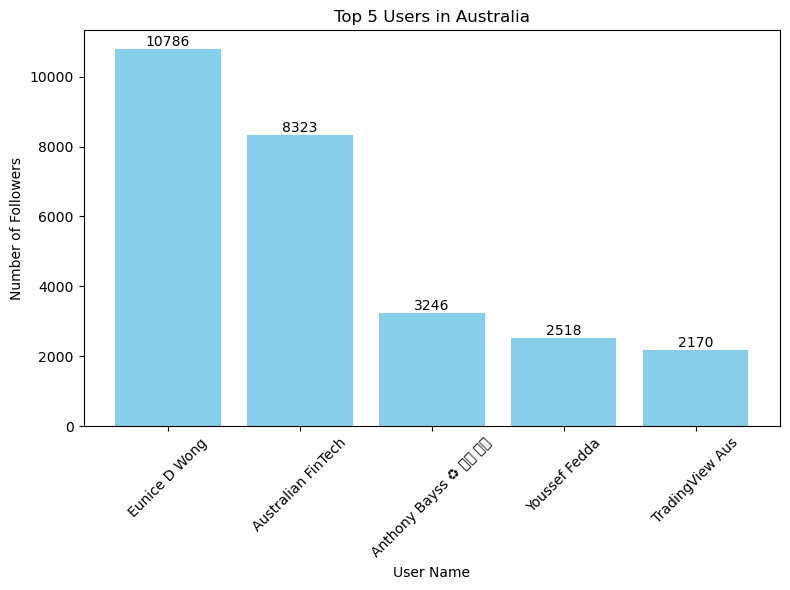

In [15]:


# Filter data for Australia
specific_location = data[data["user_location"] == "Australia"]

# Select the top 5 users with the highest follower count for Australia
top_5_users = specific_location.drop_duplicates("user_name").nlargest(5, "user_followers")

# Create a bar chart for Australia
plt.figure(figsize=(8, 6))
bars = plt.bar(top_5_users["user_name"], top_5_users["user_followers"], color='skyblue')
plt.xlabel("User Name")
plt.ylabel("Number of Followers")
plt.title("Top 5 Users in Australia")
plt.xticks(rotation=45)
plt.tight_layout()

# Add value on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{int(bar.get_height())}", ha='center', va='bottom')

plt.show()




C:\Users\91620\AppData\Local\Temp\ipykernel_23096\1438737646.py:14: UserWarning: Glyph 120436 (\N{MATHEMATICAL MONOSPACE CAPITAL E}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\1438737646.py:14: UserWarning: Glyph 120469 (\N{MATHEMATICAL MONOSPACE SMALL L}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\1438737646.py:14: UserWarning: Glyph 120462 (\N{MATHEMATICAL MONOSPACE SMALL E}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\1438737646.py:14: UserWarning: Glyph 120479 (\N{MATHEMATICAL MONOSPACE SMALL V}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\1438737646.py:14: UserWarning: Glyph 120458 (\N{MATHEMATICAL MONOSPACE SMALL A}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\1438737646.py:14: UserWarning: Glyph 120477 (\N{MATHE

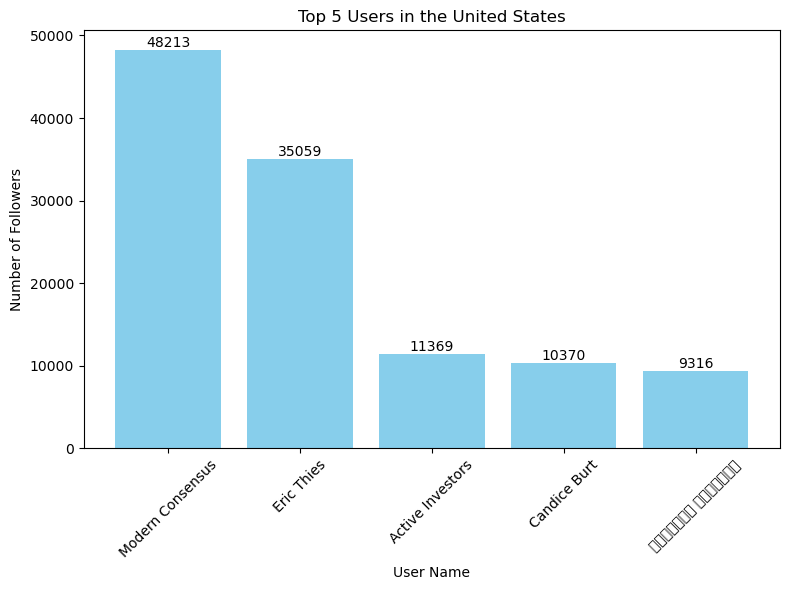

In [16]:


# Filter data for the United States
specific_location = data[data["user_location"] == "United States"]

# Select the top 5 users with the highest follower count for the United States
top_5_users = specific_location.drop_duplicates("user_name").nlargest(5, "user_followers")

# Create a bar chart for the United States
plt.figure(figsize=(8, 6))
bars = plt.bar(top_5_users["user_name"], top_5_users["user_followers"], color='skyblue')
plt.xlabel("User Name")
plt.ylabel("Number of Followers")
plt.title("Top 5 Users in the United States")
plt.xticks(rotation=45)
plt.tight_layout()

# Add value on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{int(bar.get_height())}", ha='center', va='bottom')

plt.show()



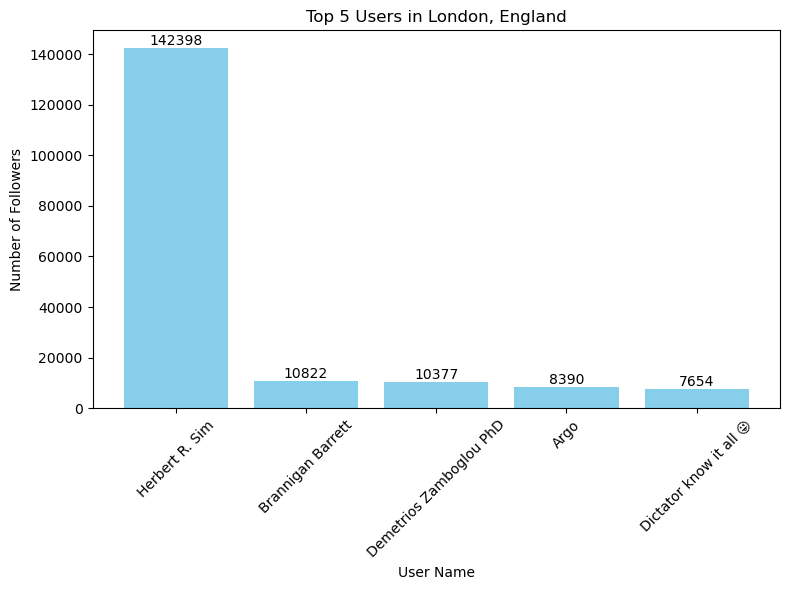

In [17]:


# Filter data for London, England
specific_location = data[data["user_location"] == "London, England"]

# Select the top 5 users with the highest follower count for London, England
top_5_users = specific_location.drop_duplicates("user_name").nlargest(5, "user_followers")

# Create a bar chart for London, England
plt.figure(figsize=(8, 6))
bars = plt.bar(top_5_users["user_name"], top_5_users["user_followers"], color='skyblue')
plt.xlabel("User Name")
plt.ylabel("Number of Followers")
plt.title("Top 5 Users in London, England")
plt.xticks(rotation=45)
plt.tight_layout()

# Add value on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{int(bar.get_height())}", ha='center', va='bottom')

plt.show()


C:\Users\91620\AppData\Local\Temp\ipykernel_23096\421795687.py:29: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\421795687.py:29: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\421795687.py:29: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\421795687.py:29: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\421795687.py:29: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  plt.tight_layout()
C:\Users\91620\AppData\Local\Temp\ipykernel_23096\421795687.py:29: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from current font.
  plt.tight_layout()
C:\Us

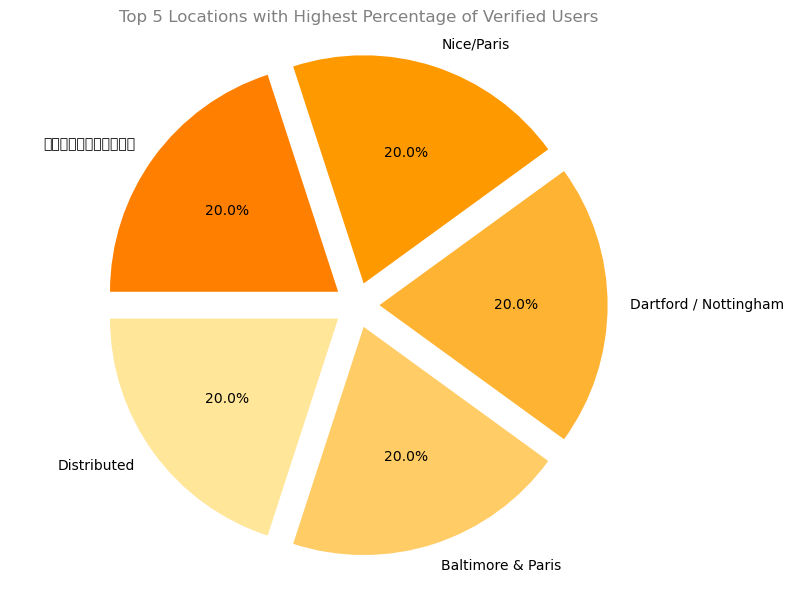

In [18]:

# Group data by 'user_location' and calculate the total number of users and their total verified users for each location
location_verified = data.groupby("user_location")["user_verified"].agg(total_users='count', total_verified='sum')

# Calculate the percentage of verified users for each location
location_verified['verified_percentage'] = (location_verified['total_verified'] / location_verified['total_users']) * 100

# Sort locations by the percentage of verified users in descending order
location_verified.sort_values(by='verified_percentage', ascending=False, inplace=True)

# Select the top 5 locations
top_5_locations = location_verified.head(5)

# Prepare explode array for top 5 locations
explode = [0.1] * 5
honey_colors = ["#ffe699", "#ffcc66", "#ffb333", "#ff9900", "#ff8000"]  # Honey color palette

# Create a pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
labels = top_5_locations.index
sizes = top_5_locations['verified_percentage']
colors = plt.cm.tab20.colors  # Use default colormap for distinct colors

# Plot the pie chart with explode and without black boundaries
wedgeprops = {'linewidth': 0}  # Remove black boundaries
plt.pie(sizes, labels=labels, autopct='%0.1f%%', explode=explode, startangle=180, wedgeprops=wedgeprops, colors=honey_colors)
plt.title("Top 5 Locations with Highest Percentage of Verified Users", color='grey')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()



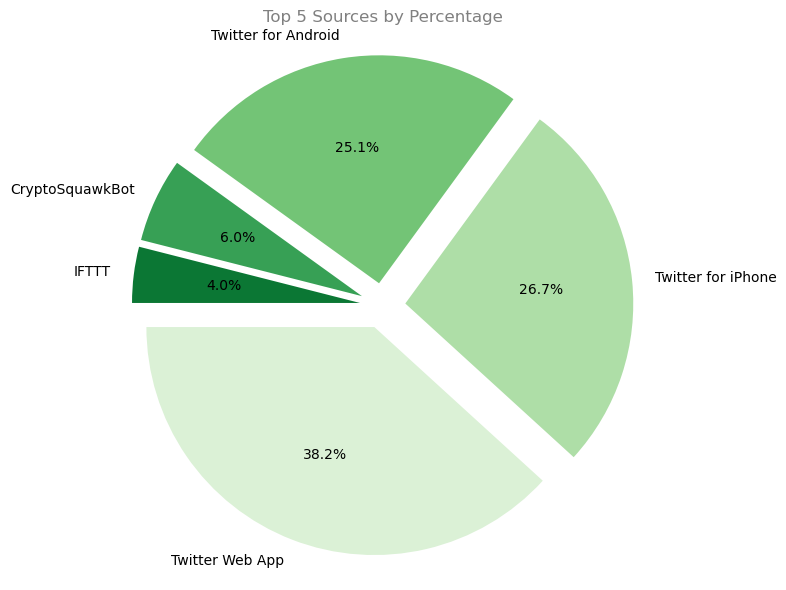

In [19]:


# Count the occurrences of each source
source_counts = data["source"].value_counts()

# Calculate the percentage of each source
total_sources = source_counts.sum()
source_percentages = (source_counts / total_sources) * 100

# Select the top 5 sources
top_5_sources = source_percentages.head(5)

# Define a custom color palette with varying shades of green
green_palette = sns.color_palette("Greens", 5)

# Prepare explode array for top 5 sources
explode = [0.1] * 5

# Create a pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
labels = top_5_sources.index
sizes = top_5_sources.values

# Plot the pie chart with custom colors, explode, and without black boundaries
wedgeprops = {'linewidth': 0}  # Remove black boundaries
plt.pie(sizes, labels=labels, autopct='%0.1f%%', explode=explode, startangle=180, wedgeprops=wedgeprops, colors=green_palette)
plt.title("Top 5 Sources by Percentage", color='grey')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()



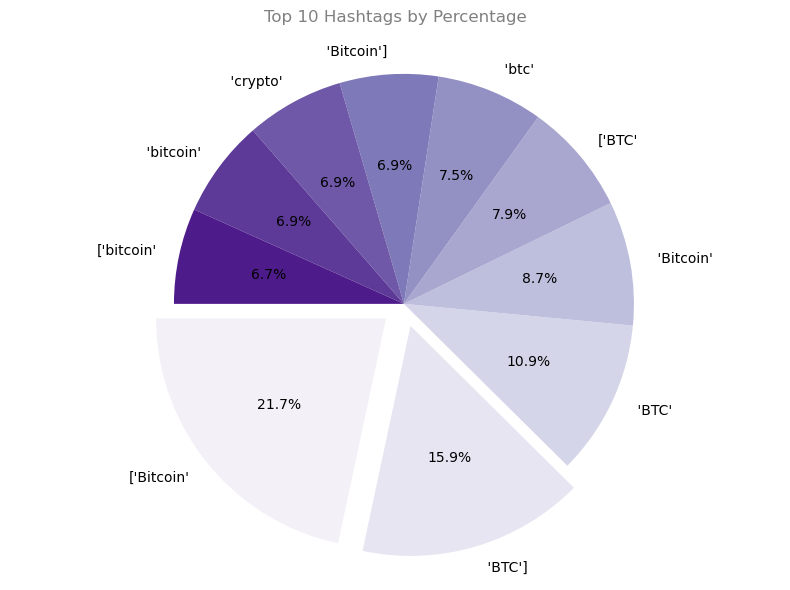

In [20]:

# Split hashtags into individual tags
hashtags = data["hashtags"].str.split(",", expand=True).stack()

# Count the occurrences of each hashtag
hashtag_counts = hashtags.value_counts()

# Select the top 10 hashtags
top_10_hashtags = hashtag_counts.head(10)

# Define a custom color palette with varying shades of purple
purple_palette = sns.color_palette("Purples", 10)

# Prepare explode array for top 10 hashtags
explode = [0.1 if idx < 2 else 0 for idx in range(10)]  # Explode only the slices corresponding to the top 2 hashtags

# Create a pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
labels = top_10_hashtags.index
sizes = top_10_hashtags.values

# Plot the pie chart with custom colors, explode, and without black boundaries
wedgeprops = {'linewidth': 0}  # Remove black boundaries
plt.pie(sizes, labels=labels, autopct='%0.1f%%', explode=explode, startangle=180, wedgeprops=wedgeprops, colors=purple_palette)
plt.title("Top 10 Hashtags by Percentage", color='grey', pad=20)  # Adding padding to the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()






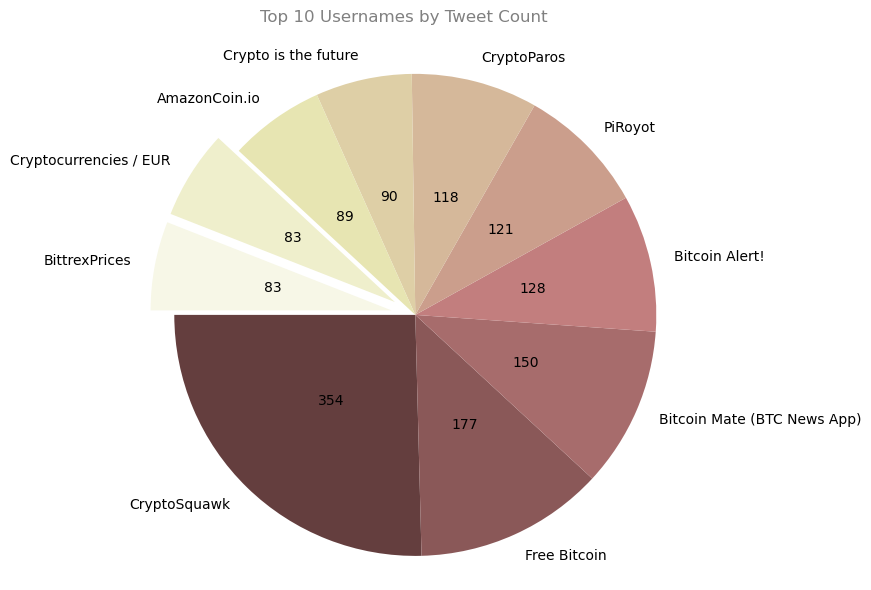

In [5]:

from math import cos, sin, radians

# Count the occurrences of each username
username_counts = data["user_name"].value_counts()

# Select the top 10 usernames
top_10_usernames = username_counts.head(10)

# Define a custom color palette with varying shades of pink
pink_palette = sns.color_palette("pink", 10)

# Prepare explode array for top 10 usernames
explode = [0] * 10
explode[-2:] = [0.1, 0.1]  # Explode the slices corresponding to the 9th and 10th top usernames

# Create a pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
labels = top_10_usernames.index  # Use usernames as labels
sizes = top_10_usernames.values

# Plot the pie chart with custom colors, explode, and without black boundaries
wedgeprops = {'linewidth': 0}  # Remove black boundaries
patches, _, _ = plt.pie(sizes, labels=labels, explode=explode, startangle=180, wedgeprops=wedgeprops, colors=pink_palette, autopct='', pctdistance=0.75)
plt.title("Top 10 Usernames by Tweet Count", color='grey', pad=20)  # Adding padding to the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add count inside each slice
for i, (size, label) in enumerate(zip(sizes, labels)):
    angle = patches[i].theta1 + (patches[i].theta2 - patches[i].theta1) / 2  # Find the middle angle of the slice
    radius = patches[i].r * 0.5  # Set radius to half of the slice radius
    x = patches[i].center[0] + radius * cos(radians(angle))  # Adjust x position
    y = patches[i].center[1] + radius * sin(radians(angle))  # Adjust y position
    plt.text(x, y, str(size), color='black', fontsize=10, ha='center', va='center')

plt.tight_layout()
plt.show()



# thankyou for watching

# machine learning

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7189 entries, 0 to 14936
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7189 non-null   float64
 1   user_name         7189 non-null   object 
 2   user_location     7189 non-null   object 
 3   user_description  7189 non-null   object 
 4   user_created      7189 non-null   object 
 5   user_followers    7189 non-null   float64
 6   user_friends      7189 non-null   float64
 7   user_favourites   7189 non-null   float64
 8   user_verified     7189 non-null   object 
 9   date              7189 non-null   object 
 10  text              7189 non-null   object 
 11  hashtags          7189 non-null   object 
 12  source            7189 non-null   object 
 13  is_retweet        7189 non-null   object 
 14  cleanText         7189 non-null   object 
 15  Polarity Score    7189 non-null   float64
 16  sentiment         7189 non-null   float64

In [24]:
x=data[['user_followers']]
y=data[['Polarity Score']]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [26]:
lgr=LinearRegression()

In [27]:
lgr.fit(x_train,y_train)

LinearRegression()

In [28]:
pred=lgr.predict(x_test)
print(pred)

[[0.08278547]
 [0.08279311]
 [0.08279391]
 ...
 [0.08279394]
 [0.08029359]
 [0.08279107]]


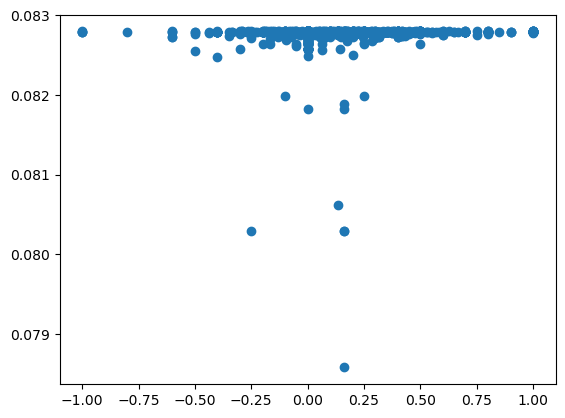

In [29]:
plt.scatter(y_test,pred)

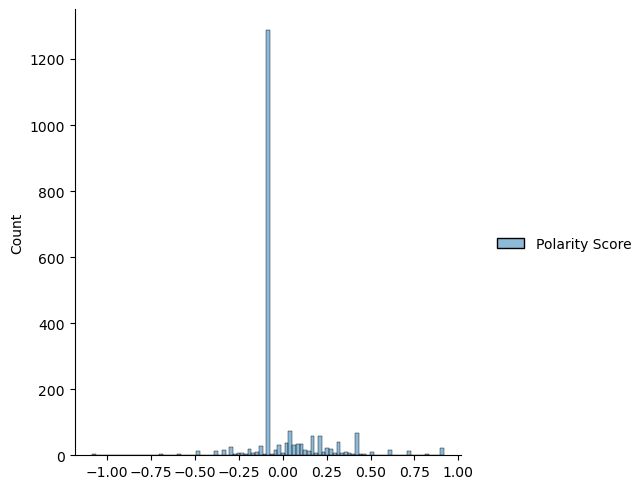

In [30]:
sns.displot(y_test-pred)

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.14985941396709263
MSE: 0.04681422632037621
RMSE: 0.21636595462404942


# NLP(Natural Laungage Processing) 

In [32]:
# Open a text file for writing with UTF-8 encoding
with open('D:/output.txt', 'w+', encoding='utf-8') as txt_file:
    # Iterate over each column in the DataFrame
    for column in data.columns:
        # Iterate over each value in the column
        for value in data[column]:
            # Check if the value is of object type (string)
            if isinstance(value, str):
                # Write the object data to the text file
                txt_file.write(str(value) + '\n')




In [33]:
# Read the text file
with open('D:/output.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# tokenization

In [34]:
from nltk.tokenize import sent_tokenize

In [35]:
sent_token=sent_tokenize(text)

In [36]:
sent_token

['DeSota Wilson\nAlex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader\nZerrBenz™ ⚔ ✪ 20732\nBitcoin-Bot\nDeSota Wilson\n@massumeh18 #RefinedWarrior #Activist\nOne Perspective\nCryptoSquawk\n$MOON\nDeSota Wilson\nCrypto M🕶️stache !',
 '🇧🇪🇯🇴🇳🇱🇮🇪\nHumayun MHA\nAlex Jiménez\nStefan Gyarmati\nDeSota Wilson\nHugo Ramos\nDeSota Wilson\n100UnitBets\nDr. ir Johannes Drooghaag (JD) 🛡\n#Mailey\nDeSota Wilson\nNishant Bhardwaj\nLanger Dan Returns\nDeSota Wilson\nBrock Connelly 📉📈\nBar Trader🍸\nAustralian FinTech\nCryptoSquawk\nBillions777\nCREAM [CRM]\nAmazonCoin.io\nTrading MarcoDaCosta\nDouglas Borthwick 🏴\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f\nTrading MarcoDaCosta\nCindi.eth🏴 §stacks\nTrading MarcoDaCosta\nMike Chambers at Northey Point\nCryptoParos\nPaulCrypto.com\nNews Corpse\nＦｉｎｔｅｃｈ ＵＫ 🇬🇧\nSimon Johnson\nBillions777\nMr Coin Miner 💯\n#Mailey\nSpyros Cryptoman De Fuego\nEze Justice\naWebAnalysis | Crypto\nwww.DeFi.radio\nNishant Bhardwaj\nPaulCrypto.com\n#Mailey\nTARTLE\nBorsatakip

In [37]:
print(sent_token[0:4])

['DeSota Wilson\nAlex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader\nZerrBenz™ ⚔ ✪ 20732\nBitcoin-Bot\nDeSota Wilson\n@massumeh18 #RefinedWarrior #Activist\nOne Perspective\nCryptoSquawk\n$MOON\nDeSota Wilson\nCrypto M🕶️stache !', '🇧🇪🇯🇴🇳🇱🇮🇪\nHumayun MHA\nAlex Jiménez\nStefan Gyarmati\nDeSota Wilson\nHugo Ramos\nDeSota Wilson\n100UnitBets\nDr. ir Johannes Drooghaag (JD) 🛡\n#Mailey\nDeSota Wilson\nNishant Bhardwaj\nLanger Dan Returns\nDeSota Wilson\nBrock Connelly 📉📈\nBar Trader🍸\nAustralian FinTech\nCryptoSquawk\nBillions777\nCREAM [CRM]\nAmazonCoin.io\nTrading MarcoDaCosta\nDouglas Borthwick 🏴\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f\nTrading MarcoDaCosta\nCindi.eth🏴 §stacks\nTrading MarcoDaCosta\nMike Chambers at Northey Point\nCryptoParos\nPaulCrypto.com\nNews Corpse\nＦｉｎｔｅｃｈ ＵＫ 🇬🇧\nSimon Johnson\nBillions777\nMr Coin Miner 💯\n#Mailey\nSpyros Cryptoman De Fuego\nEze Justice\naWebAnalysis | Crypto\nwww.DeFi.radio\nNishant Bhardwaj\nPaulCrypto.com\n#Mailey\nTARTLE\nBorsatakipc

In [38]:
from nltk.tokenize import word_tokenize

In [39]:
wt=word_tokenize(text)

In [40]:
print(wt[0:20])

['DeSota', 'Wilson', 'Alex', 'Kirchmaier', '🇦🇹🇸🇪', '#', 'FactsSuperspreader', 'ZerrBenz™', '⚔', '✪', '20732', 'Bitcoin-Bot', 'DeSota', 'Wilson', '@', 'massumeh18', '#', 'RefinedWarrior', '#', 'Activist']


In [41]:
from nltk.tokenize import RegexpTokenizer

In [42]:
re=RegexpTokenizer("[A-Z]\w+")

In [43]:
re.tokenize(text)

['DeSota',
 'Wilson',
 'Alex',
 'Kirchmaier',
 'FactsSuperspreader',
 'ZerrBenz',
 'Bitcoin',
 'Bot',
 'DeSota',
 'Wilson',
 'RefinedWarrior',
 'Activist',
 'One',
 'Perspective',
 'CryptoSquawk',
 'MOON',
 'DeSota',
 'Wilson',
 'Crypto',
 'Humayun',
 'MHA',
 'Alex',
 'Jiménez',
 'Stefan',
 'Gyarmati',
 'DeSota',
 'Wilson',
 'Hugo',
 'Ramos',
 'DeSota',
 'Wilson',
 'UnitBets',
 'Dr',
 'Johannes',
 'Drooghaag',
 'JD',
 'Mailey',
 'DeSota',
 'Wilson',
 'Nishant',
 'Bhardwaj',
 'Langer',
 'Dan',
 'Returns',
 'DeSota',
 'Wilson',
 'Brock',
 'Connelly',
 'Bar',
 'Trader',
 'Australian',
 'FinTech',
 'CryptoSquawk',
 'Billions777',
 'CREAM',
 'CRM',
 'AmazonCoin',
 'Trading',
 'MarcoDaCosta',
 'Douglas',
 'Borthwick',
 'Trading',
 'MarcoDaCosta',
 'Cindi',
 'Trading',
 'MarcoDaCosta',
 'Mike',
 'Chambers',
 'Northey',
 'Point',
 'CryptoParos',
 'PaulCrypto',
 'News',
 'Corpse',
 'Simon',
 'Johnson',
 'Billions777',
 'Mr',
 'Coin',
 'Miner',
 'Mailey',
 'Spyros',
 'Cryptoman',
 'De',
 'Fuego'

In [44]:
re=RegexpTokenizer("[0-9]\w+")
re.tokenize(text)

['20732',
 '18',
 '100UnitBets',
 '777',
 '777',
 '32',
 '42',
 '33',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '2Trade',
 '192',
 '2140data',
 '612Crypto',
 '100',
 '000',
 '192',
 '2021',
 '2050',
 '2050',
 '00ty',
 '00ty',
 '192',
 '82',
 '2025',
 '140',
 '5th',
 '4R4',
 '101',
 '14',
 '30',
 '192',
 '192',
 '20732',
 '192',
 '20',
 '50k',
 '11',
 '4547',
 '140',
 '42',
 '643',
 '3smusic',
 '45GLK',
 '77',
 '192',
 '192',
 '192',
 '1432',
 '1Million',
 '45GLK',
 '777',
 '7421',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '26K',
 '7421',
 '123charts',
 '54',
 '4dat',
 '560',
 '0DL',
 '0DL',
 '4WordPress',
 '123charts',
 '9JA',
 '192',
 '9JA',
 '9JA',
 '00ty',
 '00ty',
 '7843',
 '42',
 '1432',
 '888STARZ',
 '45GLK',
 '1432',
 '20',
 '192',
 '9JA',
 '82',
 '9JA'

In [45]:
re=RegexpTokenizer("[a-z]\w+")
re.tokenize(text)

['eSota',
 'ilson',
 'lex',
 'irchmaier',
 'actsSuperspreader',
 'errBenz',
 'itcoin',
 'ot',
 'eSota',
 'ilson',
 'massumeh18',
 'efinedWarrior',
 'ctivist',
 'ne',
 'erspective',
 'ryptoSquawk',
 'eSota',
 'ilson',
 'rypto',
 'stache',
 'umayun',
 'lex',
 'iménez',
 'tefan',
 'yarmati',
 'eSota',
 'ilson',
 'ugo',
 'amos',
 'eSota',
 'ilson',
 'nitBets',
 'ir',
 'ohannes',
 'rooghaag',
 'ailey',
 'eSota',
 'ilson',
 'ishant',
 'hardwaj',
 'anger',
 'an',
 'eturns',
 'eSota',
 'ilson',
 'rock',
 'onnelly',
 'ar',
 'rader',
 'ustralian',
 'inTech',
 'ryptoSquawk',
 'illions777',
 'mazonCoin',
 'io',
 'rading',
 'arcoDaCosta',
 'ouglas',
 'orthwick',
 'rading',
 'arcoDaCosta',
 'indi',
 'eth',
 'stacks',
 'rading',
 'arcoDaCosta',
 'ike',
 'hambers',
 'at',
 'orthey',
 'oint',
 'ryptoParos',
 'aulCrypto',
 'com',
 'ews',
 'orpse',
 'imon',
 'ohnson',
 'illions777',
 'oin',
 'iner',
 'ailey',
 'pyros',
 'ryptoman',
 'uego',
 'ze',
 'ustice',
 'aWebAnalysis',
 'rypto',
 'www',
 'eFi',
 'r

In [46]:
from nltk.tokenize import BlanklineTokenizer

In [47]:
bt=BlanklineTokenizer()

In [48]:
bt.tokenize(text)

['DeSota Wilson\nAlex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader\nZerrBenz™ ⚔ ✪ 20732\nBitcoin-Bot\nDeSota Wilson\n@massumeh18 #RefinedWarrior #Activist\nOne Perspective\nCryptoSquawk\n$MOON\nDeSota Wilson\nCrypto M🕶️stache ! 🇧🇪🇯🇴🇳🇱🇮🇪\nHumayun MHA\nAlex Jiménez\nStefan Gyarmati\nDeSota Wilson\nHugo Ramos\nDeSota Wilson\n100UnitBets\nDr. ir Johannes Drooghaag (JD) 🛡\n#Mailey\nDeSota Wilson\nNishant Bhardwaj\nLanger Dan Returns\nDeSota Wilson\nBrock Connelly 📉📈\nBar Trader🍸\nAustralian FinTech\nCryptoSquawk\nBillions777\nCREAM [CRM]\nAmazonCoin.io\nTrading MarcoDaCosta\nDouglas Borthwick 🏴\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f\nTrading MarcoDaCosta\nCindi.eth🏴 §stacks\nTrading MarcoDaCosta\nMike Chambers at Northey Point\nCryptoParos\nPaulCrypto.com\nNews Corpse\nＦｉｎｔｅｃｈ ＵＫ 🇬🇧\nSimon Johnson\nBillions777\nMr Coin Miner 💯\n#Mailey\nSpyros Cryptoman De Fuego\nEze Justice\naWebAnalysis | Crypto\nwww.DeFi.radio\nNishant Bhardwaj\nPaulCrypto.com\n#Mailey\nTARTLE\nBorsatakipcisi

# frequency distribution

In [49]:
from nltk.probability import FreqDist

In [50]:
fdist=FreqDist(wt)

In [51]:
print(fdist)

<FreqDist with 45225 samples and 551066 outcomes>


In [52]:
fdist.most_common(20)

[('#', 33278),
 (',', 25879),
 ("'", 22744),
 (':', 11764),
 ('.', 9898),
 ('bitcoin', 9206),
 ('https', 8702),
 ('btc', 8240),
 ('[', 7249),
 (']', 7249),
 ('Bitcoin', 7129),
 ('$', 7030),
 ('Twitter', 5494),
 ('BTC', 5065),
 ('for', 4941),
 ('@', 4320),
 ("'Bitcoin", 3806),
 ('the', 3596),
 ('!', 3484),
 ("'BTC", 3253)]

In [53]:
fdist.most_common(30)

[('#', 33278),
 (',', 25879),
 ("'", 22744),
 (':', 11764),
 ('.', 9898),
 ('bitcoin', 9206),
 ('https', 8702),
 ('btc', 8240),
 ('[', 7249),
 (']', 7249),
 ('Bitcoin', 7129),
 ('$', 7030),
 ('Twitter', 5494),
 ('BTC', 5065),
 ('for', 4941),
 ('@', 4320),
 ("'Bitcoin", 3806),
 ('the', 3596),
 ('!', 3484),
 ("'BTC", 3253),
 ('crypto', 3109),
 ('to', 3026),
 ('and', 2864),
 ('2/8/2021', 2830),
 ('|', 2574),
 ('Crypto', 2516),
 ('in', 2374),
 ('App', 2307),
 ('Web', 2286),
 ('of', 2220)]

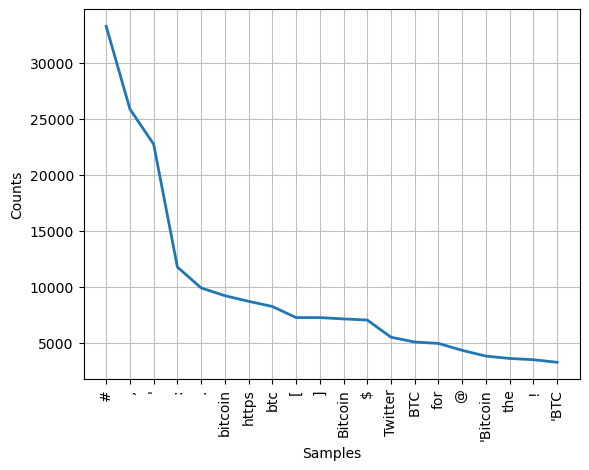

<Axes: xlabel='Samples', ylabel='Counts'>

In [54]:
fdist.plot(20)

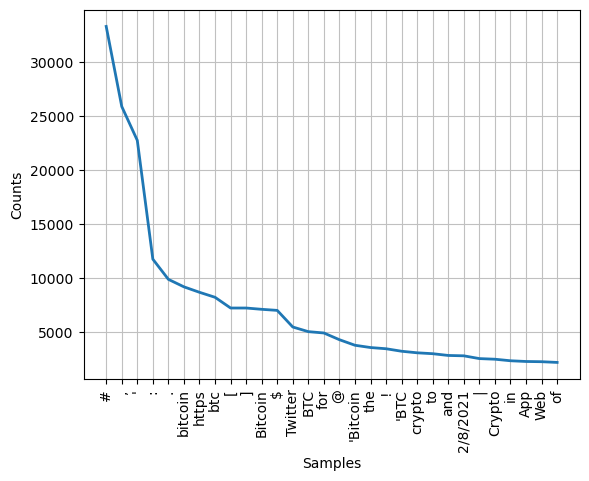

<Axes: xlabel='Samples', ylabel='Counts'>

In [55]:
fdist.plot(30)

# stopwords

In [56]:
from nltk.corpus import stopwords

In [57]:
stop_words=set(stopwords.words("english"))

In [58]:
print(stop_words)

{'against', 'other', 'in', 'i', 'yourselves', 'again', 'an', 'its', 'whom', 'mightn', 'yours', 'herself', 'itself', 'being', 'before', 'ourselves', 'm', "didn't", 'between', 'this', 'for', 'theirs', 'him', 'once', "you've", 'he', 'than', 'we', 'through', 'didn', 'his', "hasn't", 'there', 'ain', "mightn't", 'where', 'yourself', 'did', 're', 'haven', 'are', "needn't", 'above', 'only', "couldn't", 'ours', 'o', "won't", 'on', 'few', 'should', 'am', 'but', 'shan', 'won', 'ma', 'by', 'their', 'no', "that'll", 'from', 'here', 'or', 'it', 'a', 'if', 'both', 'not', 'will', 'they', 'have', 'been', 'down', 'she', 'the', 'at', "don't", 'just', 'myself', 'after', 'over', 'isn', 'shouldn', 'some', 'be', 'off', 't', 'don', 'during', 'themselves', 'out', 'most', 'that', "haven't", 'who', 'about', 'our', 'my', 'your', 'nor', 'himself', 'is', 'what', 'when', 's', "shouldn't", 'mustn', 'll', "you'd", 'them', 'while', 'more', 'aren', 'hasn', 'weren', 'hers', 'with', 'as', 'you', 'until', "you're", 'below'

In [59]:
filtered_words=[]

In [60]:
for w in wt:
    if w not in stop_words:
        if len(w)>3:
            filtered_words.append(w)
fdist=FreqDist(filtered_words)
print(fdist)

<FreqDist with 40470 samples and 287938 outcomes>


In [61]:
fdist.most_common(20)

[('bitcoin', 9206),
 ('https', 8702),
 ('Bitcoin', 7129),
 ('Twitter', 5494),
 ("'Bitcoin", 3806),
 ("'BTC", 3253),
 ('crypto', 3109),
 ('2/8/2021', 2830),
 ('Crypto', 2516),
 ('2/9/2021', 2068),
 ("'bitcoin", 1702),
 ('2/10/2021', 1658),
 ('iPhone', 1585),
 ('cryptocurrency', 1573),
 ('price', 1530),
 ('Android', 1515),
 ("'btc", 1511),
 ('trading', 1273),
 ('elonmusk', 1148),
 ('tesla', 1097)]

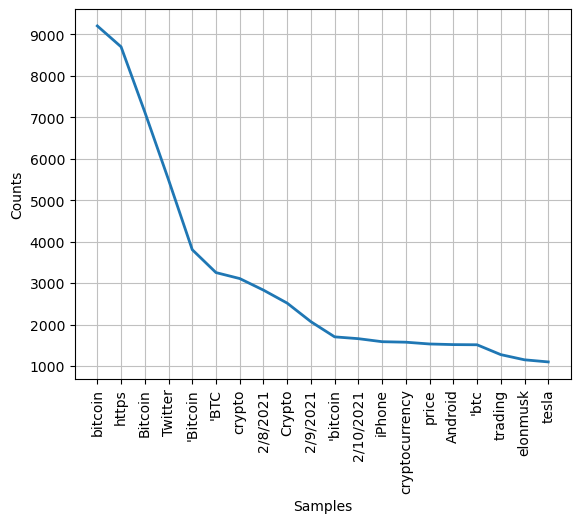

<Axes: xlabel='Samples', ylabel='Counts'>

In [62]:
fdist.plot(20)

# tags

In [63]:
tags=nltk.pos_tag(wt)
tags

[('DeSota', 'NNP'),
 ('Wilson', 'NNP'),
 ('Alex', 'NNP'),
 ('Kirchmaier', 'NNP'),
 ('🇦🇹🇸🇪', 'NNP'),
 ('#', '#'),
 ('FactsSuperspreader', 'NNP'),
 ('ZerrBenz™', 'NNP'),
 ('⚔', 'NNP'),
 ('✪', 'VBD'),
 ('20732', 'CD'),
 ('Bitcoin-Bot', 'NNP'),
 ('DeSota', 'NNP'),
 ('Wilson', 'NNP'),
 ('@', 'NNP'),
 ('massumeh18', 'NN'),
 ('#', '#'),
 ('RefinedWarrior', 'NNP'),
 ('#', '#'),
 ('Activist', 'NNP'),
 ('One', 'NNP'),
 ('Perspective', 'NNP'),
 ('CryptoSquawk', 'NNP'),
 ('$', '$'),
 ('MOON', 'NNP'),
 ('DeSota', 'NNP'),
 ('Wilson', 'NNP'),
 ('Crypto', 'NNP'),
 ('M🕶️stache', 'NNP'),
 ('!', '.'),
 ('🇧🇪🇯🇴🇳🇱🇮🇪', 'NN'),
 ('Humayun', 'NNP'),
 ('MHA', 'NNP'),
 ('Alex', 'NNP'),
 ('Jiménez', 'NNP'),
 ('Stefan', 'NNP'),
 ('Gyarmati', 'NNP'),
 ('DeSota', 'NNP'),
 ('Wilson', 'NNP'),
 ('Hugo', 'NNP'),
 ('Ramos', 'NNP'),
 ('DeSota', 'NNP'),
 ('Wilson', 'NNP'),
 ('100UnitBets', 'CD'),
 ('Dr.', 'NNP'),
 ('ir', 'NN'),
 ('Johannes', 'NNP'),
 ('Drooghaag', 'NNP'),
 ('(', '('),
 ('JD', 'NNP'),
 (')', ')'),
 ('🛡', 'VB

In [64]:
grammar=('''NP:{<NNP><]]><NN>}''')

In [65]:
'''chunk_par=nltk.RegexpParser(grammar)
tree= chunk_par.parse(tags)
tree.draw()'''


'chunk_par=nltk.RegexpParser(grammar)\ntree= chunk_par.parse(tags)\ntree.draw()'

In [66]:
fdist.tabulate()

                                                                                          bitcoin                                                                                             https                                                                                           Bitcoin                                                                                           Twitter                                                                                          'Bitcoin                                                                                              'BTC                                                                                            crypto                                                                                          2/8/2021                                                                                            Crypto                                                                                          2/9/2021                     